# Import Libraries

In [120]:
# For Dataframes and arrays
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Preprocessing Data
    # Train:Test split
from sklearn.model_selection import train_test_split
    # Scaling
from sklearn.preprocessing import StandardScaler

In [2]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [3]:
# DO NOT REMOVE This
%reload_ext autoreload

In [111]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po
from src import custom as cm

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

In [5]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

# Import Data

In [6]:
combined = pd.read_csv('../data/processed/combined')
fighters = pd.read_csv('../data/processed/fighters_cleaned')
bouts = pd.read_csv('../data/processed/bouts_cleaned')
raw_fighters = pd.read_csv('../data/raw/ufc_fighters.csv')

## Date Preprocessing

In [121]:
X = combined.drop(['date', 'fighter1', 'fighter2', 'winner_is_fighter1'],axis=1)
y = combined['winner_is_fighter1']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [123]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Visualizations

## Comparison of Ages
- either have age today hist or age at fight, but then need to not input median value for age, this reults in people who are 11 at the time of the fight.

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


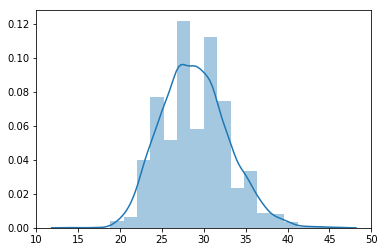

In [19]:
f1_age = 'fighter1_age_at_fight'
f2_age = 'fighter2_age_at_fight'
f1_wins = combined['winner_is_fighter1']==1
f2_wins = combined['winner_is_fighter1']==0

f1_ages = combined[f1_wins][f1_age]
f2_ages = combined[f2_wins][f2_age]
ages = f1_ages.append(f2_ages)

sns.distplot(ages, bins=20)



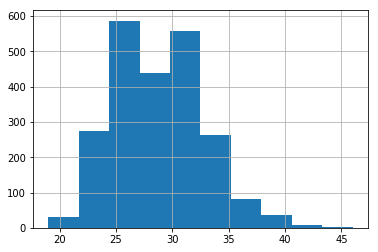

In [5]:

age_diff = combined[f1_wins][f1_age] - combined[f1_wins][f2_age]
age_diff.hist()

## Fighter Hometowns

## Most Important Features

## Comparison of Models

## Confusion Matrix of XG Boost

## Fighter Stats

In [7]:
fighters.head(2)

,name,dob,age_today,win,lose,draw,total_bouts,win_rate,height_inches,reach,...,stance_southpaw,stance_switch,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg
0,Luciano Azevedo,1981-06-25,38.0,16,9,1,25,0.64,75.0,72.0,...,0,0,0.76,45,1.97,27,2.28,11,0,0.0
1,Gleidson Cutis,1989-02-07,30.0,7,3,0,10,0.70,69.0,72.0,...,0,0,2.99,52,8.28,59,0.00,0,0,0.0


In [ ]:
fighter_cols = list(fighters.columns)

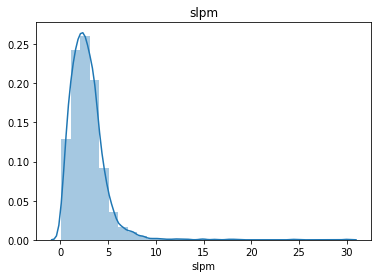

In [55]:
col = 15
ax = sns.distplot(fighters[fighter_cols[col]], bins=30);
ax.set_title(fighter_cols[col]);

In [ ]:

fig, axs = plt.subplots(2)
axs[0].hist(fighters[fighter_cols[0]])
axs[1].hist(fighters[fighter_cols[1]])

# for i, col in enumerate(fighter_cols):
#     axs[i].title(col)
#     axs[i].hist(fighters[col], bins=30)

### Fighter Win rate

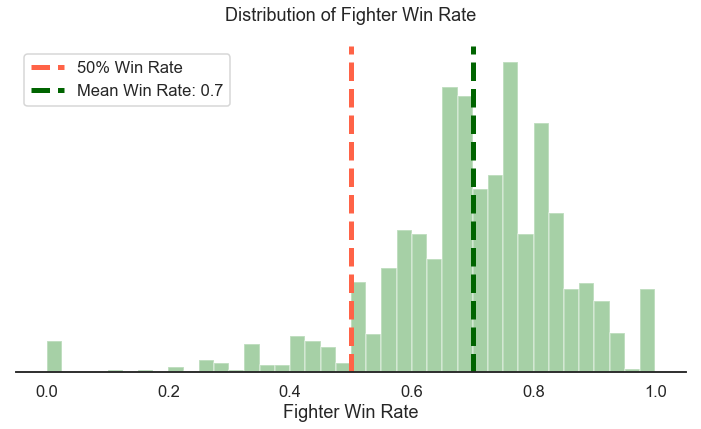

In [112]:
cm.plot_sns_distplot(fighters, 'win_rate', 'Fighter Win Rate')

In [ ]:
   # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(loss) + 1)
    ax = sns.scatterplot(x=epochs, y=loss, color='darkred');
    
    # Title and Axis
    ax.set_title(title)
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Loss')
    sns.despine()

### Fighter Stance 

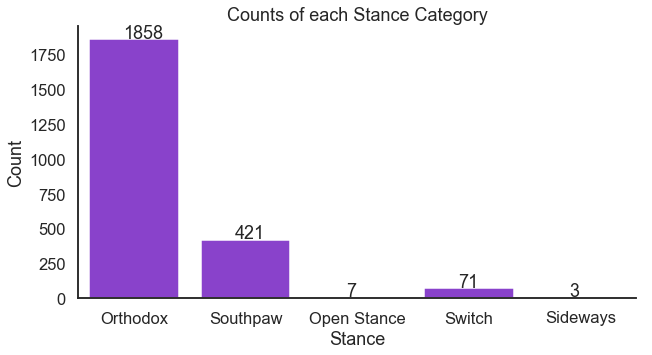

In [117]:
cm.column_countplot(raw_fighters, 'stance', show_count=True)

## Feature Importance

In [125]:
X_train_top_features = X_train.copy()
X_train_top_features = cm.rename_top_features(X_train_top_features)

In [129]:
rf_accuracy = cm.model_random_forest(X_train_top_features,
                                     y_train,
                                     X_test,
                                     y_test,
                                     max_depth_=4,
                                     min_samples_leaf_=0.05,
                                     min_samples_split_=0.05,
                                     n_estimators_=110,
                                     plot_importances=True)

Accuracy for Random Forest model : 69.6%


TypeError: slice indices must be integers or None or have an __index__ method

## 